## Working with exit surveys

#### Data Cleaning Proj. By : Eng. Hosam El Nagar
from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey and the survey for the DETE here:
 * https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey
 * https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey

## Questions :

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
.
   * Employment Period >> Resignation due to some kind of dissatisfaction?

.
.

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
.
   * Employee Age >> Resignation due to some kind of dissatisfaction?
   
[A different approach.](https://github.com/dataquestio/solutions/blob/master/Mission348Solutions.ipynb)

---
### *Imports:*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
srv1 = pd.read_csv('dete_survey.csv')
srv2 = pd.read_csv('tafe_survey.csv')

---
### *Primary Analysis*:

In [3]:
srv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
srv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [5]:
srv1.head(1)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes


In [6]:
srv2.head(1)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2


In [7]:
srv1.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [8]:
srv2.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [9]:
print('servey 1 is :',srv1.shape)

for i in srv1.columns:
    print('=================================')
    print('Column :', i)
    print(srv1[i].value_counts())

servey 1 is : (822, 56)
Column : ID
823    1
270    1
280    1
279    1
278    1
277    1
276    1
275    1
274    1
273    1
272    1
271    1
269    1
282    1
268    1
267    1
266    1
265    1
264    1
263    1
262    1
261    1
260    1
259    1
281    1
283    1
308    1
296    1
306    1
305    1
      ..
520    1
519    1
518    1
517    1
539    1
540    1
541    1
542    1
563    1
562    1
561    1
560    1
559    1
558    1
557    1
556    1
555    1
554    1
553    1
552    1
551    1
550    1
549    1
548    1
547    1
546    1
545    1
544    1
543    1
1      1
Name: ID, Length: 822, dtype: int64
Column : SeparationType
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Ter

In [10]:
print('servey 2 is :',srv2.shape)

for i in srv2.columns:
    print('=================================')
    print('Column :', i)
    print(srv2[i].value_counts())

servey 2 is : (702, 72)
Column : Record ID
6.342194e+17    1
6.349929e+17    1
6.342081e+17    1
6.345951e+17    1
6.341719e+17    1
6.343298e+17    1
6.342607e+17    1
6.345684e+17    1
6.346382e+17    1
6.345771e+17    1
6.345683e+17    1
6.349822e+17    1
6.348673e+17    1
6.348499e+17    1
6.347949e+17    1
6.344810e+17    1
6.347335e+17    1
6.343231e+17    1
6.345529e+17    1
6.345415e+17    1
6.345873e+17    1
6.346849e+17    1
6.347533e+17    1
6.347350e+17    1
6.347436e+17    1
6.348525e+17    1
6.347619e+17    1
6.345708e+17    1
6.346868e+17    1
6.345823e+17    1
               ..
6.347230e+17    1
6.345535e+17    1
6.345925e+17    1
6.345812e+17    1
6.343282e+17    1
6.341579e+17    1
6.343651e+17    1
6.348977e+17    1
6.344180e+17    1
6.345762e+17    1
6.342090e+17    1
6.349044e+17    1
6.349443e+17    1
6.349028e+17    1
6.350003e+17    1
6.348544e+17    1
6.345581e+17    1
6.344924e+17    1
6.350374e+17    1
6.346676e+17    1
6.345641e+17    1
6.345641e+17    1
6.3

### *Required Information:*

Required Data|Needed Cols from servey 1|Needed Cols from servey 2
--|:--:|:--:
Employment Period |'Cease Date'<br><br>'DETE Start Date'<br>|'CESSATION YEAR'<br><br>'LengthofServiceOverall.<br>Overall Length of Service at Institute (in years)'
Employee Age |'Age'|'CurrentAge. Current Age'
Resignation Reason |'SeparationType'<br>'Job dissatisfaction'<br>'Dissatisfaction with the department'<br>'Physical work environment'<br>'Work location'<br>'Lack of recognition'<br>'Lack of job security'<br>'Employment conditions'<br>'Work life balance'<br>'Workload'|'Contributing Factors. Dissatisfaction'<br>'Contributing Factors. Job Dissatisfaction'
Other?!!|'ID'<br>'Gender'|'Record ID'<br>'Gender. What is your Gender?'

In [11]:
srv1_cols=[
    'SeparationType',
    'Cease Date',
    'DETE Start Date',
    'Age',
    'Job dissatisfaction',
    'Dissatisfaction with the department',
    'Physical work environment',
    'Work location',
    'Lack of recognition',
    'Lack of job security',
    'Employment conditions',
    'Work life balance',
    'Workload' 
]

srv2_cols=[
    'Reason for ceasing employment',
    'CESSATION YEAR',
    'Contributing Factors. Dissatisfaction',
    'Contributing Factors. Job Dissatisfaction',
#     'Main Factor. Which of these was the main factor for leaving?',
    'CurrentAge. Current Age',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)'
]

srv1 = pd.read_csv('dete_survey.csv', usecols=srv1_cols, na_values='Not Stated')
srv2 = pd.read_csv('tafe_survey.csv', usecols=srv2_cols)


# advice:
#     drop from dete_survey: dete_survey.columns[28:49]
#     drop from tafe_survey: tafe_survey.columns[17:66]

In [12]:
srv1['Cease Date'].value_counts(dropna=False)

2012       344
2013       200
01/2014     43
12/2013     40
NaN         34
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
08/2012      2
04/2014      2
04/2013      2
07/2014      2
02/2014      2
07/2006      1
2014         1
09/2010      1
09/2014      1
2010         1
07/2012      1
11/2012      1
Name: Cease Date, dtype: int64

---
### *Common Col Names:*

dete_survey (srv1) | tafe_survey (srv2) | Renaming to
--|--|--
~~ID~~ | ~~Record ID~~ |~~id~~
SeparationType | Reason for ceasing employment | separationtype
Cease Date | CESSATION YEAR | cease_date
DETE Start Date || start_date
| LengthofServiceOverall.<br>Overall Length of Service at Institute (in years) | service_length
Age | CurrentAge. Current Age | age
~~Gender~~ | ~~Gender. What is your Gender?~~ | ~~gender~~

In [13]:
# Cleaning-up Column Names:

srv1.columns = srv1.columns.str.lower().str.strip().str.replace(' ', '_')\
                           .str.replace('dete_', '')


srv2.columns = srv2.columns.str.lower().str.strip().str.replace(' ', '_')\
                           .str.replace('record_', '')\
                           .str.replace('reason_for_ceasing_employment', 'separationtype')\
                           .str.replace('cessation_year','cease_date')\
                           .str.replace('currentage._current_','')\
                           .str.replace('._what_is_your_gender','')\
                           .str.replace('?','')

In [14]:
srv1.columns

Index(['separationtype', 'cease_date', 'start_date', 'job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance', 'workload', 'age'],
      dtype='object')

In [15]:
srv2.columns

Index(['cease_date', 'separationtype', 'contributing_factors._dissatisfaction',
       'contributing_factors._job_dissatisfaction', 'age',
       'lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)'],
      dtype='object')

In [16]:
set1 = set(srv1.columns)
set2 = set(srv2.columns)

set1.intersection(set2)


{'age', 'cease_date', 'separationtype'}

---
### *Selecting 'Resignation' Data:*

In [17]:
for i in [srv1, srv2]:
    print(i['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [18]:
cc = srv1['separationtype'].str.contains('Resignation')
srv1[cc]['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [19]:
cc = srv2['separationtype'].str.contains('Resignation').fillna(False)
srv2[cc]['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

In [20]:
# Dropping all rows without the word 'Resignation' in 'separationtype' cols

for i in [srv1, srv2]:
    print('Before Removal:\n', i['separationtype'].value_counts(),'\n\n')
    
    sel_bool = i['separationtype'].str.contains('Resignation').fillna(False)
    
    print('Only needed rows before Removal:\n', i[sel_bool]['separationtype'].value_counts(),'\n\n')
    
    i.drop(i.index[~sel_bool], axis=0, inplace=True)
    
    print('After Removal:\n', i['separationtype'].value_counts(),'=================================')

Before Removal:
 Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64 


Only needed rows before Removal:
 Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64 


After Removal:
 Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64 =================================
Before Removal:
 Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement     

---
### Any Other Errors?

In [21]:
srv1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 13 columns):
separationtype                         311 non-null object
cease_date                             300 non-null object
start_date                             283 non-null float64
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_environment              311 non-null bool
lack_of_recognition                    311 non-null bool
lack_of_job_security                   311 non-null bool
work_location                          311 non-null bool
employment_conditions                  311 non-null bool
work_life_balance                      311 non-null bool
workload                               311 non-null bool
age                                    306 non-null object
dtypes: bool(9), float64(1), object(3)
memory usage: 14.9+ KB


In [22]:
srv2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 6 columns):
cease_date                                                                   335 non-null float64
separationtype                                                               340 non-null object
contributing_factors._dissatisfaction                                        332 non-null object
contributing_factors._job_dissatisfaction                                    332 non-null object
age                                                                          290 non-null object
lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)    290 non-null object
dtypes: float64(1), object(5)
memory usage: 18.6+ KB


In [23]:
for i in [srv1, srv2]:
    print(i['cease_date'].value_counts(dropna=False))

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2006      1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64
 2011.0    116
 2012.0     94
 2010.0     68
 2013.0     55
NaN          5
 2009.0      2
Name: cease_date, dtype: int64


In [24]:
print(srv1['start_date'].value_counts())

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: start_date, dtype: int64


In [25]:
# Fixing those wierd looking dates:

srv1['cease_date'] = srv1['cease_date'].str.extract(r'[0-9]{0,2}\/*([0-9]{4})', expand=False).astype('float')
srv1['cease_date'].value_counts(dropna=False)

 2013.0    146
 2012.0    129
 2014.0     22
NaN         11
 2010.0      2
 2006.0      1
Name: cease_date, dtype: int64

In [26]:
# calculating srv1 'service_length':

srv1['service_length'] = srv1['cease_date']-srv1['start_date']

srv1['service_length'].value_counts(dropna=False)


# Renaming srv2 'service_length' col to match:

srv2.columns = srv2.columns.str.replace('lengthofserviceoverall\._overall_length_of_service_at_institute_\(in_years\)',
                                        'service_length')

In [27]:
set1 = set(srv1.columns)
set2 = set(srv2.columns)

set1.intersection(set2)


{'age', 'cease_date', 'separationtype', 'service_length'}

In [28]:
# Building a 'diss' col for the Dissatisfied:

# Columns to consider for srv1:

# job_dissatisfaction
# dissatisfaction_with_the_department
# physical_work_environment
# lack_of_recognition
# lack_of_job_security
# work_location
# employment_conditions
# work_life_balance
# workload

#  and their values :

# # True
# # False


srv1['diss'] = srv1['job_dissatisfaction'] | srv1['dissatisfaction_with_the_department'] | srv1['physical_work_environment'] | srv1['lack_of_recognition'] | srv1['lack_of_job_security'] | srv1['work_location'] | srv1['employment_conditions'] | srv1['work_life_balance'] | srv1['workload']


In [29]:
print(srv1['job_dissatisfaction'].value_counts(dropna=False))
print(srv1['dissatisfaction_with_the_department'].value_counts(dropna=False))
print(srv1['physical_work_environment'].value_counts(dropna=False))
print(srv1['lack_of_recognition'].value_counts(dropna=False))
print(srv1['lack_of_job_security'].value_counts(dropna=False))
print(srv1['work_location'].value_counts(dropna=False))
print(srv1['employment_conditions'].value_counts(dropna=False))
print(srv1['work_life_balance'].value_counts(dropna=False))
print(srv1['workload'].value_counts(dropna=False))
print('===================================')
print(srv1['diss'].value_counts(dropna=False))

False    270
True      41
Name: job_dissatisfaction, dtype: int64
False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64
False    305
True       6
Name: physical_work_environment, dtype: int64
False    278
True      33
Name: lack_of_recognition, dtype: int64
False    297
True      14
Name: lack_of_job_security, dtype: int64
False    293
True      18
Name: work_location, dtype: int64
False    288
True      23
Name: employment_conditions, dtype: int64
False    243
True      68
Name: work_life_balance, dtype: int64
False    284
True      27
Name: workload, dtype: int64
False    162
True     149
Name: diss, dtype: int64


In [30]:
# Columns to consider for srv2:

# contributing_factors._dissatisfaction    :                      
# # -                                   
# # Contributing Factors. Dissatisfaction 


# contributing_factors._job_dissatisfaction    :                  
# # -               
# # Job Dissatisfaction 



x = srv2['contributing_factors._dissatisfaction'].str.contains('Dissatisfaction')
y = srv2['contributing_factors._job_dissatisfaction'].str.contains('Dissatisfaction')

srv2['diss'] = x | y

In [31]:
print(srv2['contributing_factors._dissatisfaction'].value_counts(dropna=False))
print(srv2['contributing_factors._job_dissatisfaction'].value_counts(dropna=False))
print('==================================')
print(srv2['diss'].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: contributing_factors._dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: contributing_factors._job_dissatisfaction, dtype: int64
False    249
True      91
Name: diss, dtype: int64


In [32]:
# After our changes, the new diss column will contain just the following values:

#   True: indicates a person resigned because they were dissatisfied with the job.
#   False: indicates a person resigned because of another reason or the value is missing.

In [33]:
# Dropping Used Columns:

del srv1['job_dissatisfaction']
del srv1['dissatisfaction_with_the_department']
del srv1['physical_work_environment']
del srv1['lack_of_recognition']
del srv1['lack_of_job_security']
del srv1['work_location']
del srv1['employment_conditions']
del srv1['work_life_balance']
del srv1['workload']
del srv2['contributing_factors._dissatisfaction']
del srv2['contributing_factors._job_dissatisfaction']

In [34]:
del srv1['cease_date']
del srv1['start_date']
del srv1['separationtype']

del srv2['cease_date']
del srv2['separationtype']

In [35]:
for i in [srv1, srv2]:
    print(i.columns)
#     print(i['age'].value_counts())

Index(['age', 'service_length', 'diss'], dtype='object')
Index(['age', 'service_length', 'diss'], dtype='object')



---
### *NaN Analysis:*

In [36]:
srv1.isna().sum()

age                5
service_length    38
diss               0
dtype: int64

In [37]:
srv2.isna().sum()

age               50
service_length    50
diss               0
dtype: int64

---
---

---
### Combining dataframes:

In [38]:
# First we add a column to each dataframe to allow us to easily distinguish between them:
srv1['institute']='DETE'
srv2['institute']='TAFE'

In [39]:
# We'll use the slightly modified definitions below:

#     New:         < 3 years at a company
#     Experienced: 3-6 years at a company
#     Established: 7-10 years at a company
#     Veteran:     >= 11 years at a company



def def_group(i):
    if         i <= 2  : return 'New'
    elif  3 <= i <= 6  : return 'Experienced'
    elif  7 <= i <= 10 : return 'Established'
    elif       i >= 11 : return 'Veteran'
    


srv1['service_cat'] = srv1['service_length'].apply(def_group)

print(srv1['service_cat'].value_counts(dropna=False))


# Assuming that 1-2 is one year (for comparison with other approach)

srv2['service_cat'] = srv2['service_length'].str.extract(r'(\d+)', expand=False).astype('float').apply(def_group)

print(srv2['service_cat'].value_counts(dropna=False))

Veteran        100
Experienced     76
New             56
Established     41
NaN             38
Name: service_cat, dtype: int64
New            137
Experienced     96
NaN             50
Veteran         36
Established     21
Name: service_cat, dtype: int64


In [40]:
merged = pd.concat([srv1, srv2])
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 5 columns):
age               596 non-null object
service_length    563 non-null object
diss              651 non-null bool
institute         651 non-null object
service_cat       563 non-null object
dtypes: bool(1), object(4)
memory usage: 26.1+ KB


In [41]:
merged['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Questions :

* Are new employees resigning due to some kind of dissatisfaction? What about more veteran employees?
.
   * Employment Period >> Resignation Reason

.
.

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
.
   * Employee Age >> Resignation Reason

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



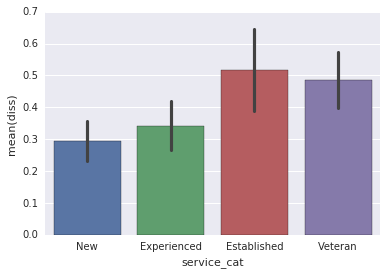

In [59]:
# percentage of dissatisfied employees in each service_cat group.

# print( merged.pivot_table('diss','service_cat', aggfunc=lambda x : sum(x)/sum(merged['diss'])*100   ))

sns.barplot(x = merged['service_cat'], y = merged['diss'], order=['New', 'Experienced', 'Established', 'Veteran'])
plt.show()

### More to do :

* Decide how to handle the rest of the missing values. Then, aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?
* Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?
* Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?
* Format your project using [this project style guide](https://www.dataquest.io/blog/data-science-project-style-guide/).
